# HW18

### Author: Joseph Wong

## Import the Packages

In [1]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!
# I had chatGPT break the packages into groups here

# ============================================================
# Basic packages
# ============================================================
import os                             # For file and directory operations
import numpy as np                    # For numerical computing and arrays
import pandas as pd                   # For data manipulation and analysis

# ============================================================
# Visualization packages
# ============================================================
import matplotlib.pyplot as plt        # Static 2D plotting
import seaborn as sns                  # Statistical data visualization built on matplotlib

# Interactive visualization with Plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'colab'        # Set renderer for interactive output in Colab or notebooks

# ============================================================
# Scikit-learn: Core utilities for model building and evaluation
# ============================================================
from sklearn.model_selection import train_test_split    # Train/test data splitting
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler  # Feature transformations and scaling
from sklearn.metrics import (                            # Model evaluation metrics
    mean_squared_error, r2_score, accuracy_score, 
    precision_score, recall_score, confusion_matrix, 
    classification_report
)

# ============================================================
# Scikit-learn: Linear and polynomial models
# ============================================================
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor       # For KNN

# ============================================================
# Scikit-learn: Synthetic dataset generators
# ============================================================
from sklearn.datasets import make_classification, make_regression

# ============================================================
# Scikit-learn: Naive Bayes models
# ============================================================
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

# ============================================================
# Scikit-learn: Decision Trees
# ============================================================
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# ============================================================
# Text Processing Packages and Code
# ============================================================
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer


# ============================================================
# Dimensionality Reduction
# ============================================================
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Part 1: Data Loading and Preprocessing

1. Load the Wine dataset.
2. Explore the data: feature distributions, summary statistics, check for outliers.
3. Standardize the features using Standard Scalar. Explain why scaling is important before PCA.

In [2]:
from sklearn.datasets import load_wine

data = load_wine(as_frame=True)
df = data.data
df['target'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

There are 178 observations and 14 variables. 13 of the variables are numeric, while the 14th is 'target', which is categorical (uses numerical encoding). Looking at the summary statistics for the variables, it seems that most have minimums and maximums without or around 3 standard deviations away from the mean. An exception is 'magnesium', so we will analyze its distribution to find potential outliers.

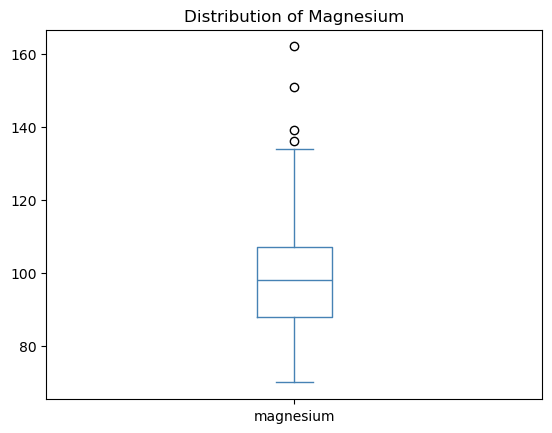

In [4]:
df['magnesium'].plot(kind='box', color='steelblue', title='Distribution of Magnesium')
plt.show()

From the box plot, it appears that 'magnesium' has some outliers. The two points near 140 are close enough, so we will just consider the two farther points outliers. We will make note of this when analyzing the data.

### Test Train Validate Split

In [5]:
df.keys()

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [6]:
x_cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']
y_cols = ['target']

X = df[x_cols]
y = df[y_cols]

# first split: hold out test data
seed = 16
X_train, X_test_full, y_train, y_test_full = train_test_split(X, y, test_size=0.2, random_state=seed)

# second split: create a validation set from the testing data
X_test, X_val, y_test, y_val = train_test_split(X_test_full, y_test_full, test_size=0.5, random_state=seed)

# final proportions are 80% train / 10% val / 10% test

print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

Train: 142, Validation: 18, Test: 18


### Standardize the Features

In [7]:
# define the scalar
scaler = StandardScaler()
# find mu and sigma of the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# transform the validation data
X_val_scaled = scaler.transform(X_val)
# transform the test data
X_test_scaled = scaler.transform(X_test)

It is crucial to standardize the features prior to principal component analysis because PCA assumes the dataset is centered with a mean of 0.

## Part 2: PCA

1. Perform PCA on standardized data.
2. Compute variance explained by each principal component. You could plot this.
3. Choose 2 or 3 components, project the data, visualize 2D/3D scatter plots colored by wine class.
4. Interpret: which components separate classes? Which features contribute most?

In [8]:
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X_train_scaled)

# eigenvalues show amount of variance explained by the associated eigenvector
print("Eigenvalues show the variance:", pca.explained_variance_)
# sum of explained variance ratios tells us how much of the variance is captured
print("Explained variance ratio:", pca.explained_variance_ratio_)

Eigenvalues show the variance: [4.51697766 2.60788553 1.51121419 1.03406929 0.86192728 0.63766118
 0.5206294  0.37299252 0.2780859  0.26291985 0.20950275 0.17103582
 0.10729721]
Explained variance ratio: [0.34501292 0.19919386 0.1154286  0.07898362 0.06583518 0.04870543
 0.03976638 0.02848968 0.02124058 0.02008218 0.01600211 0.01306395
 0.00819551]


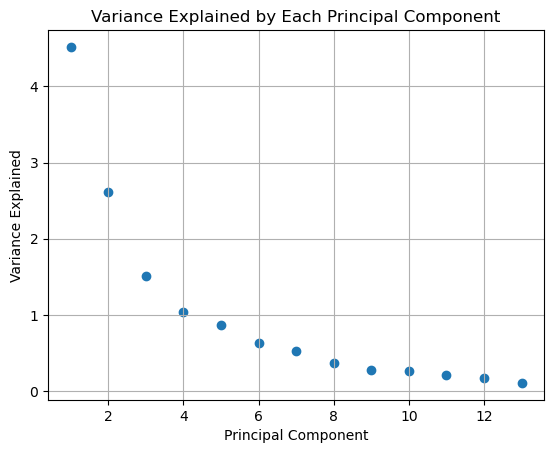

In [9]:
plt.scatter(range(1,14), pca.explained_variance_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Each Principal Component")
plt.grid()

Principal components 1 and 2 seem to have higher amounts of variance explained while the rest have more similar lower amounts of variance explained.

In [10]:
0.34501292 + 0.19919386

0.54420678

Using 2 components would capture around 54.4207% of the data's variance.

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# .squeeze() converts it to a single dataframe column
y_train = y_train.squeeze()

df_model = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "target": y_train.astype(str)
})

fig = px.scatter(
    df_model,
    x="PC1",
    y="PC2",
    color="target",
    height=500,
    width=500
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(
    title="Wine Data in 2D (PCA)",
    legend_title_text='Wine Cultivar Class',            # legend title
    legend=dict(
        itemsizing='constant',            # fix spacing
        traceorder="normal"
    ),
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2'
    )
)

fig.show()

Explained variance ratio: [0.34501292 0.19919386]


Both PC1 and PC2 contribute to separating the classes. It seems that PC1 contributes more to the class separations. This is also supported by the explained variance ratio, as PC1 is greater than PC2.

## Part 3: t-SNE

1. Apply t-SNE to standardized data to embed into 2D.
2. Try at least two different values of **perplexity** (e.g., 5, 30, 50).
3. Plot the results and color points by wine class.
4. Compare embeddings: how does perplexity affect the structure?
5. (Optional) Try reducing dimensionality with PCA first, then t-SNE.

In [12]:
perplexities = [5, 30, 50]

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, learning_rate="auto", init="random")
    X_tsne = tsne.fit_transform(X_train_scaled)
    
    df_model = pd.DataFrame({
        "TSNE1": X_tsne[:,0],
        "TSNE2": X_tsne[:,1],
        "target": y_train.astype(str)
    })
    
    fig = px.scatter(
        df_model,
        x="TSNE1",
        y="TSNE2",
        color="target",
        opacity=0.7,
        height=500,
        width=500
    )
    
    fig.update_traces(marker=dict(size=5))
    fig.update_layout(
        title="Wine Data in 2D (TSNE) (Perplexity = " + str(p) + ")",
        legend_title_text='Wine Cultivar Class',            # legend title
        legend=dict(
            itemsizing='constant',            # fix spacing
            traceorder="normal"
        ),
        scene=dict(
            xaxis_title='TSNE1',
            yaxis_title='TSNE2'
        )
    )
    
    fig.show()

C:\Users\josee\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\josee\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\josee\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\josee\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

With a perplexity of 5, the TSNE graph appears to be somewhat positively linear, with the classes being grouped in order (0 class near smaller TSNE1 values, 2 class near larger TSNE1 values). With a perplexity of 30, the TSNE graph appears to be somewhat negatively linear, with the classes being grouped in reverse order (2 class near smaller TSNE1 values, 0 class near larger TSNE1 values). With a perplexity of 50, the TSNE graph appears to lack a signficant linear relationship, but the classes are still stratified nicely. Greater perplexity values consider more neighboring points, which reveals larger scale patterns in the data while smaller perplexity values consider fewer neighbors and may reveal more detailed clusters.

## Part 4: Reflection

- What is captured by PCA? Did the first few components align with meaningful features?
- How did t-SNE differ from PCA in class separation?
- How sensitive was t-SNE to hyperparameters?
- Any other observations?

PCA captures the most important patterns in the data by finding the directions that maximize variance, which are called principal components. The sum of the explained variance ratios for the first five components is 0.80445418. This means around 80.4454% of the variance is captured by the first 5 PCs. This is relatively high and suggests that down-scaling the dimensionality could be an effective technique for this dataset. PCA is a linear method and tries to preserve global trends found in the entire dataset (i.e. distances and variances). On the other hand, t-SNE is a nonlinear method and has perplexity as a parameter. Changing perplexity changes how many neighboring points are considered, so either smaller patterns or global trends could be viewed depending on this value. t-SNE is rather sensitive to hyperparameters. As seen by the graphs below, changing the perplexity by 1 can change how the graph looks entirely.

In [13]:
perplexities = [5, 6, 7]

for p in perplexities:
    tsne = TSNE(n_components=2, perplexity=p, learning_rate="auto", init="random")
    X_tsne = tsne.fit_transform(X_train_scaled)
    
    df_model = pd.DataFrame({
        "TSNE1": X_tsne[:,0],
        "TSNE2": X_tsne[:,1],
        "target": y_train.astype(str)
    })
    
    fig = px.scatter(
        df_model,
        x="TSNE1",
        y="TSNE2",
        color="target",
        opacity=0.7,
        height=500,
        width=500
    )
    
    fig.update_traces(marker=dict(size=5))
    fig.update_layout(
        title="Wine Data in 2D (TSNE) (Perplexity = " + str(p) + ")",
        legend_title_text='Wine Cultivar Class',            # legend title
        legend=dict(
            itemsizing='constant',            # fix spacing
            traceorder="normal"
        ),
        scene=dict(
            xaxis_title='TSNE1',
            yaxis_title='TSNE2'
        )
    )
    
    fig.show()